In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Data_Set/titanic_data.csv')
df_pre = df.copy()

In [97]:
df_pre = df.copy()

In [98]:
# หาค่าเฉลี่ยของอายุในแต่ละคลาส
mean_c1 = df_pre[df_pre.Pclass == 1]['Age'].mean()
mean_c2 = df_pre[df_pre.Pclass == 2]['Age'].mean()
mean_c3 = df_pre[df_pre.Pclass == 3]['Age'].mean()
print(mean_c1,mean_c2,mean_c3)

38.233440860215055 29.87763005780347 25.14061971830986


In [99]:
# ใส่ค่าเฉลี่ยของอายุในแต่ละคลาส ที่มีค่า na 
df_pre.loc[df_pre.Pclass == 1,'Age'] = df_pre[df_pre.Pclass == 1]['Age'].fillna(mean_c1)
df_pre.loc[df_pre.Pclass == 2,'Age'] = df_pre[df_pre.Pclass == 2]['Age'].fillna(mean_c2)
df_pre.loc[df_pre.Pclass == 3,'Age'] = df_pre[df_pre.Pclass == 3]['Age'].fillna(mean_c3)

In [100]:
# เปลี่ยน Embarked เป็น เลข 
df_pre.loc[(df_pre.Embarked == 'S'),'Embarked_num'] = 0
df_pre.loc[(df_pre.Embarked == 'Q'),'Embarked_num'] = 2
df_pre.loc[(df_pre.Embarked == 'C'),'Embarked_num'] = 1

In [101]:
# เปลี่ยน Sex เป็น เลข 
df_pre.loc[(df_pre.Sex == 'male'),'Sex_num'] = 0
df_pre.loc[(df_pre.Sex == 'female'),'Sex_num'] = 1


(array([  9., 734.,  99.,  43.,   6.]),
 array([ 0.92 , 16.736, 32.552, 48.368, 64.184, 80.   ]),
 <a list of 5 Patch objects>)

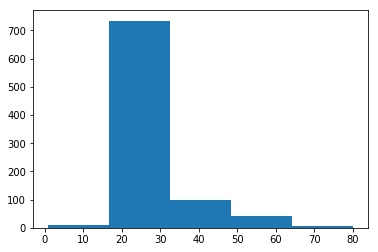

In [59]:
# ดู Histogram
plt.hist(df_pre.Age , bins = 5 )

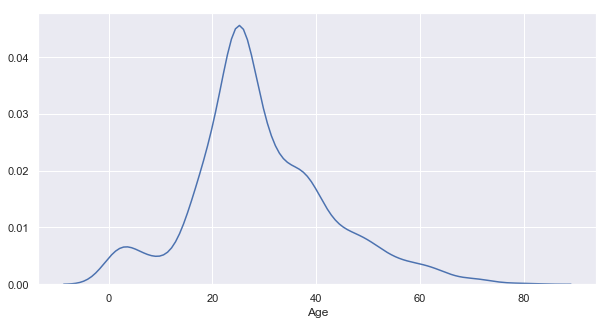

In [112]:
#plot ข้อมูลด้วย hist
sns.distplot(df_pre.Age, bins = 10 , hist = False )


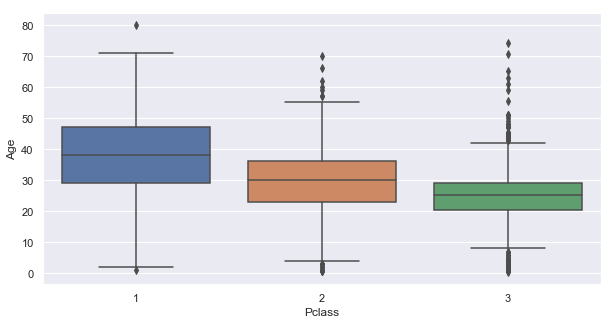

In [109]:
#plot ข้อมูลด้วย boxplot
sns.boxplot(df_pre.Pclass ,  df_pre.Age)